In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colaboratory/vgsales.csv')

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
df['Year'].median()

2007.0

In [7]:
df['Publisher'].mode()

0    Electronic Arts
dtype: object

In [8]:
df['Year'] = df['Year'].fillna(df['Year'].mean())
df['Publisher'] = df['Publisher'].fillna(df['Publisher'].mode()[0])

In [9]:
df['Year'] = df['Year'].astype('int')

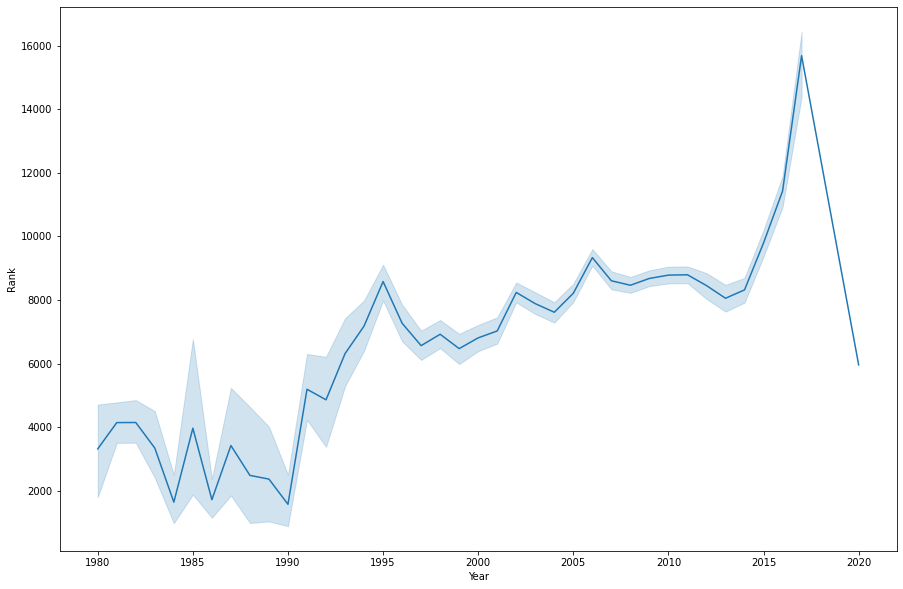

In [10]:
plt.figure(figsize = (15, 10))
sns.lineplot(data = df, y = 'Rank', x = 'Year')

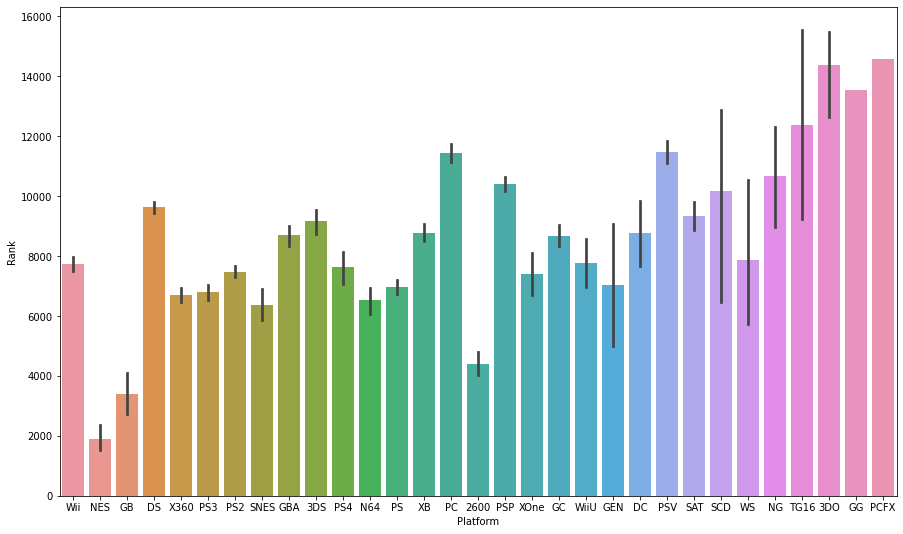

In [18]:
plt.figure(figsize = (15,9))
sns.barplot(data = df, x = 'Platform', y = 'Rank')

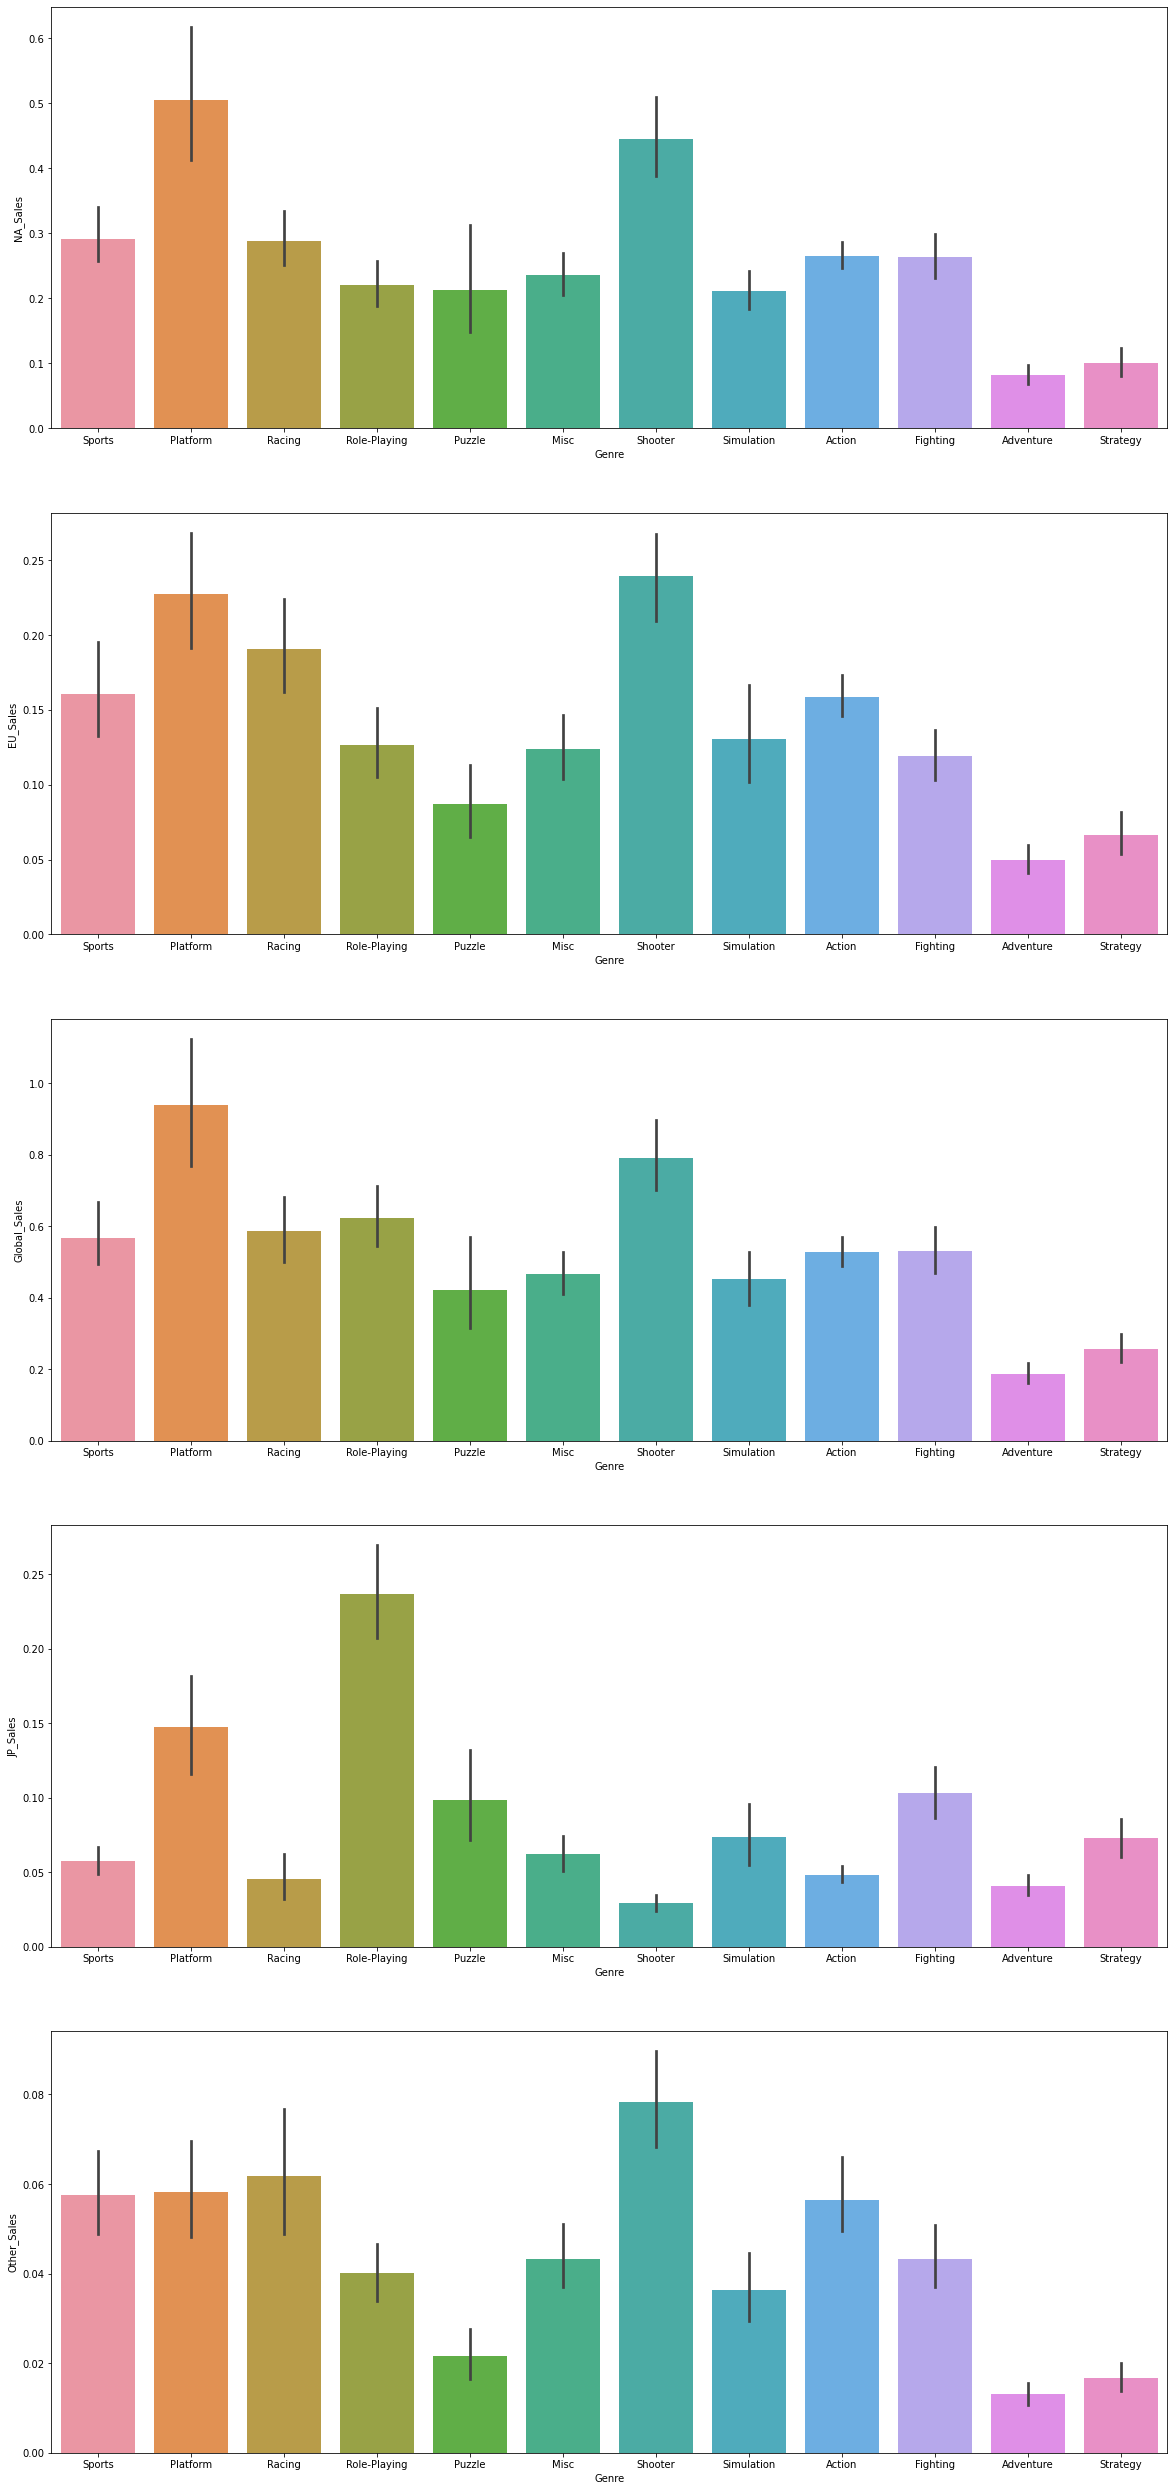

In [11]:
sales = ['NA_Sales', 'EU_Sales', 'Global_Sales', 'JP_Sales', 'Other_Sales']

f, ax = plt.subplots(5, 1, figsize = (20, 45))

for i, col in enumerate(sales):
  sns.barplot(data = df, x = 'Genre', y = col, ax = ax[i])
  ax[i].set_xticklabels(ax[i].get_xticklabels())


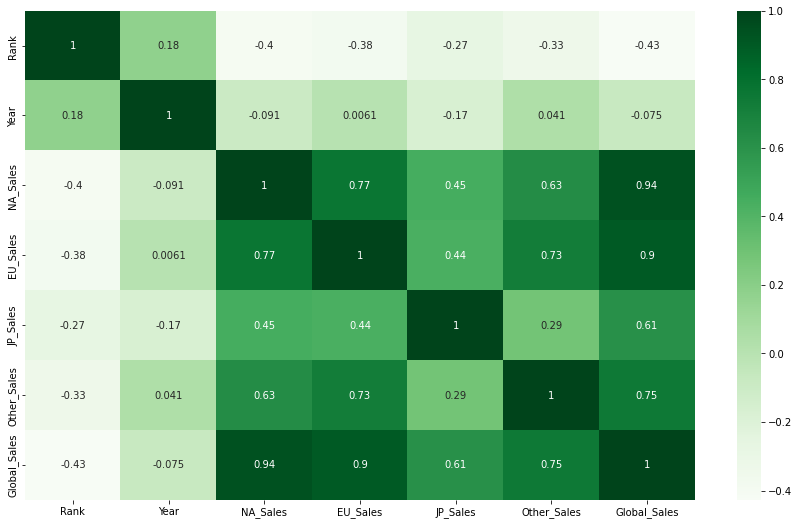

In [12]:
plt.figure(figsize = (15, 9))
sns.heatmap(df.corr(), annot = True, cmap = 'Greens')

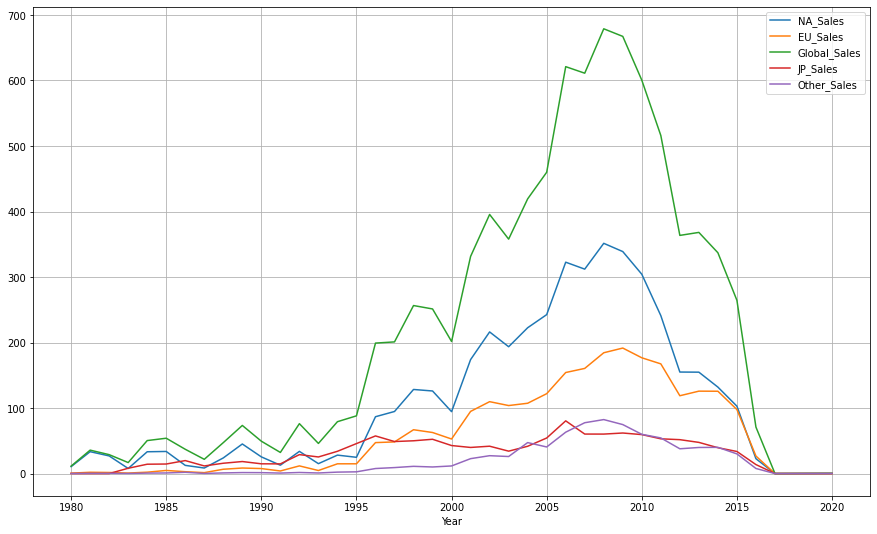

In [13]:
# sales_per_year = df['Year'].groupby(sales)
sales_per_year = df.groupby('Year')[sales].sum()
# sales_per_year = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
sales_per_year.plot(figsize = (15, 9))
plt.grid()


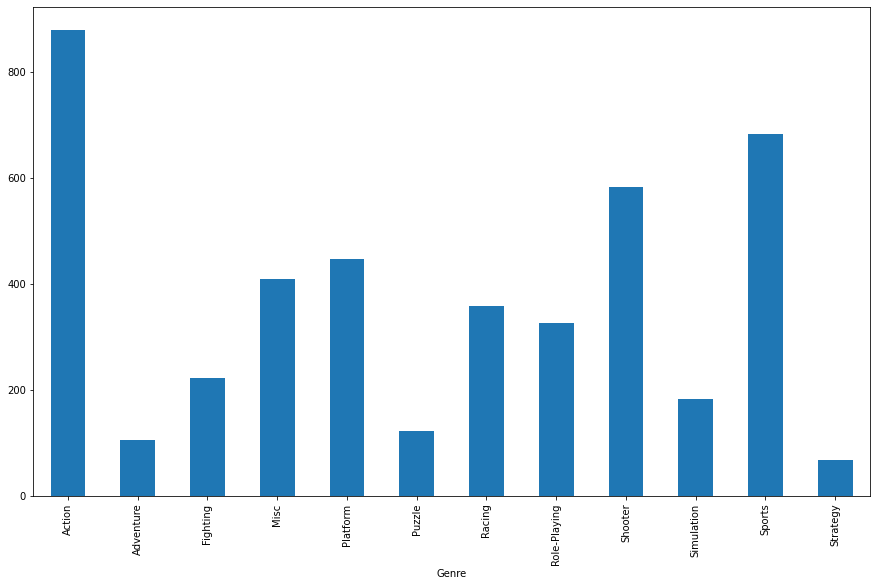

In [22]:
plt.figure(figsize = (15, 9))
df.groupby(['Genre'])['NA_Sales'].sum().plot.bar()


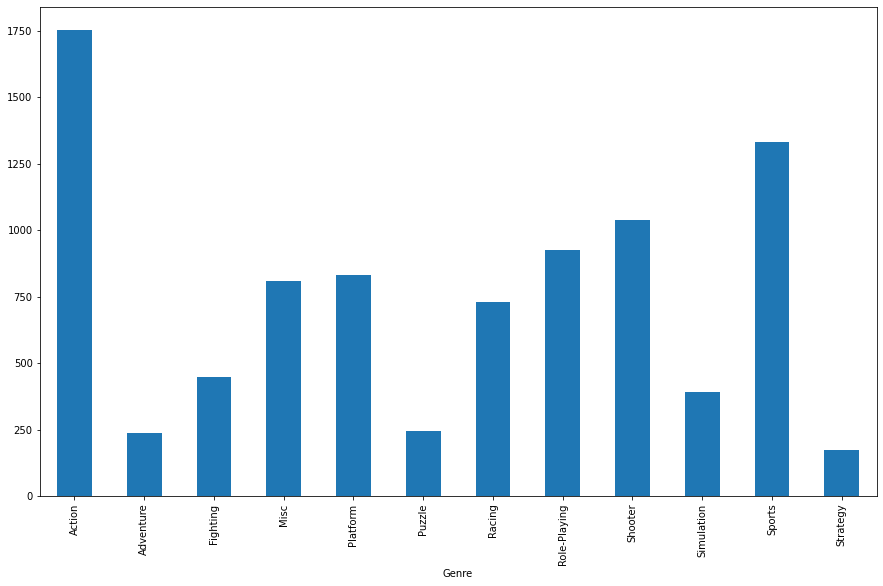

In [23]:
plt.figure(figsize = (15, 9))
df.groupby(['Genre'])['Global_Sales'].sum().plot.bar()

In [14]:
le = LabelEncoder()

encode = ['Genre', 'Platform']

for col in encode:
  df[col] = le.fit_transform(df[col])

# df['Genre'] = le.fit_transform(df['Genre'])
# df['Platform'] = le.fit_transform(df['Platform'])

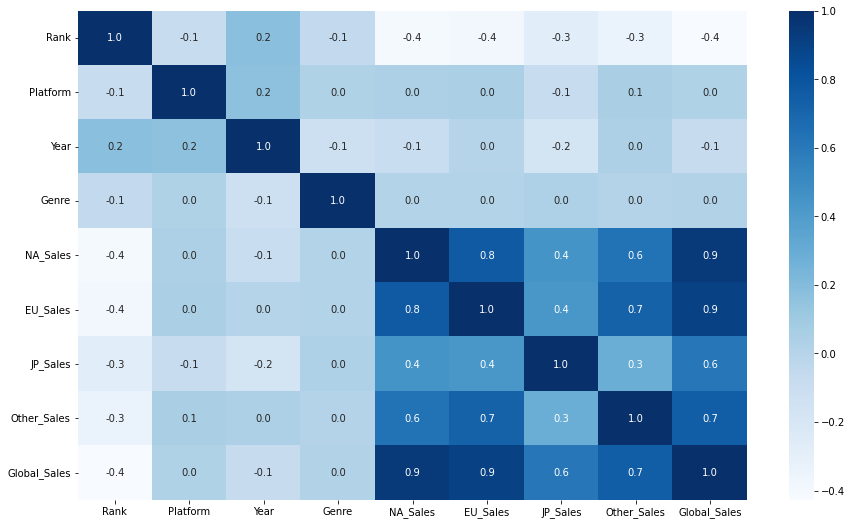

In [15]:
plt.figure(figsize = (15, 9))
sns.heatmap(df.corr(), annot = True, fmt = '.1f', cmap= 'Blues')

In [16]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,26,2006,10,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,11,1985,4,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,26,2008,6,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,26,2009,10,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,5,1996,7,Nintendo,11.27,8.89,10.22,1.00,31.37


In [17]:
X = df.drop(columns = ['Global_Sales', 'Name', 'Publisher'], axis = 1)
y = df['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

print('Shape of X_train ', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_train', y_train.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train  (13278, 8)
Shape of X_test (3320, 8)
Shape of y_train (13278,)
Shape of y_test (3320,)


In [18]:
scale = StandardScaler()

X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.fit_transform(X_test)


In [19]:
# Random Forest Regressor 

forest = RandomForestRegressor()
forest.fit(X_train_scale, y_train)
forest.score(X_train_scale, y_train)

0.999321682322756

In [20]:
y_pred = forest.predict(X_test_scale)
r2 = r2_score(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)

In [21]:
print('r2:', r2)
print('maen_absolute_error:', mae)
print('mean_squared_error:', mse)

r2: 0.4008997153207158
maen_absolute_error: 0.04228834337349414
mean_squared_error: 1.0407103818042174


In [22]:
# Gradinet Boosting Regressor 

gboost = GradientBoostingRegressor()
gboost.fit(X_train_scale, y_train)
gboost.score(X_train_scale, y_train)

0.9999330619239708

In [23]:
y_pred = gboost.predict(X_test_scale)
r2 = r2_score(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)

In [24]:
print('r2:', r2)
print('maen_absolute_error:', mae)
print('mean_squared_error:', mse)

r2: 0.3298179030521443
maen_absolute_error: 0.04619045808183551
mean_squared_error: 1.1218754422884847


In [25]:
# Linear Regression

linreg = LinearRegression()
linreg.fit(X_train_scale, y_train)
linreg.score(X_train_scale, y_train)

0.9999862488630005

In [ ]:
y_pred = linreg.predict(X_test_scale)
r2 = r2_score(y_pred, y_test)
mae = mean_absolute_error()